In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

import random

### 1st Test

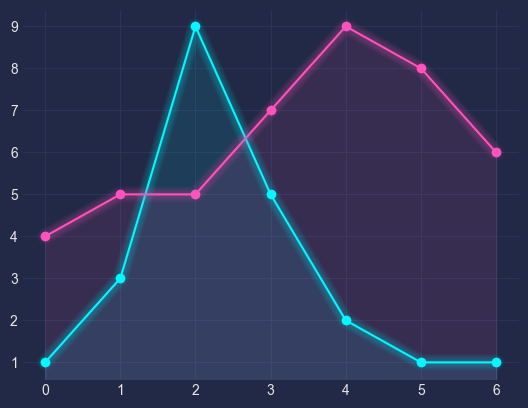

In [28]:
plt.style.use("cyberpunk")

plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='o')

mplcyberpunk.add_glow_effects()

plt.show()

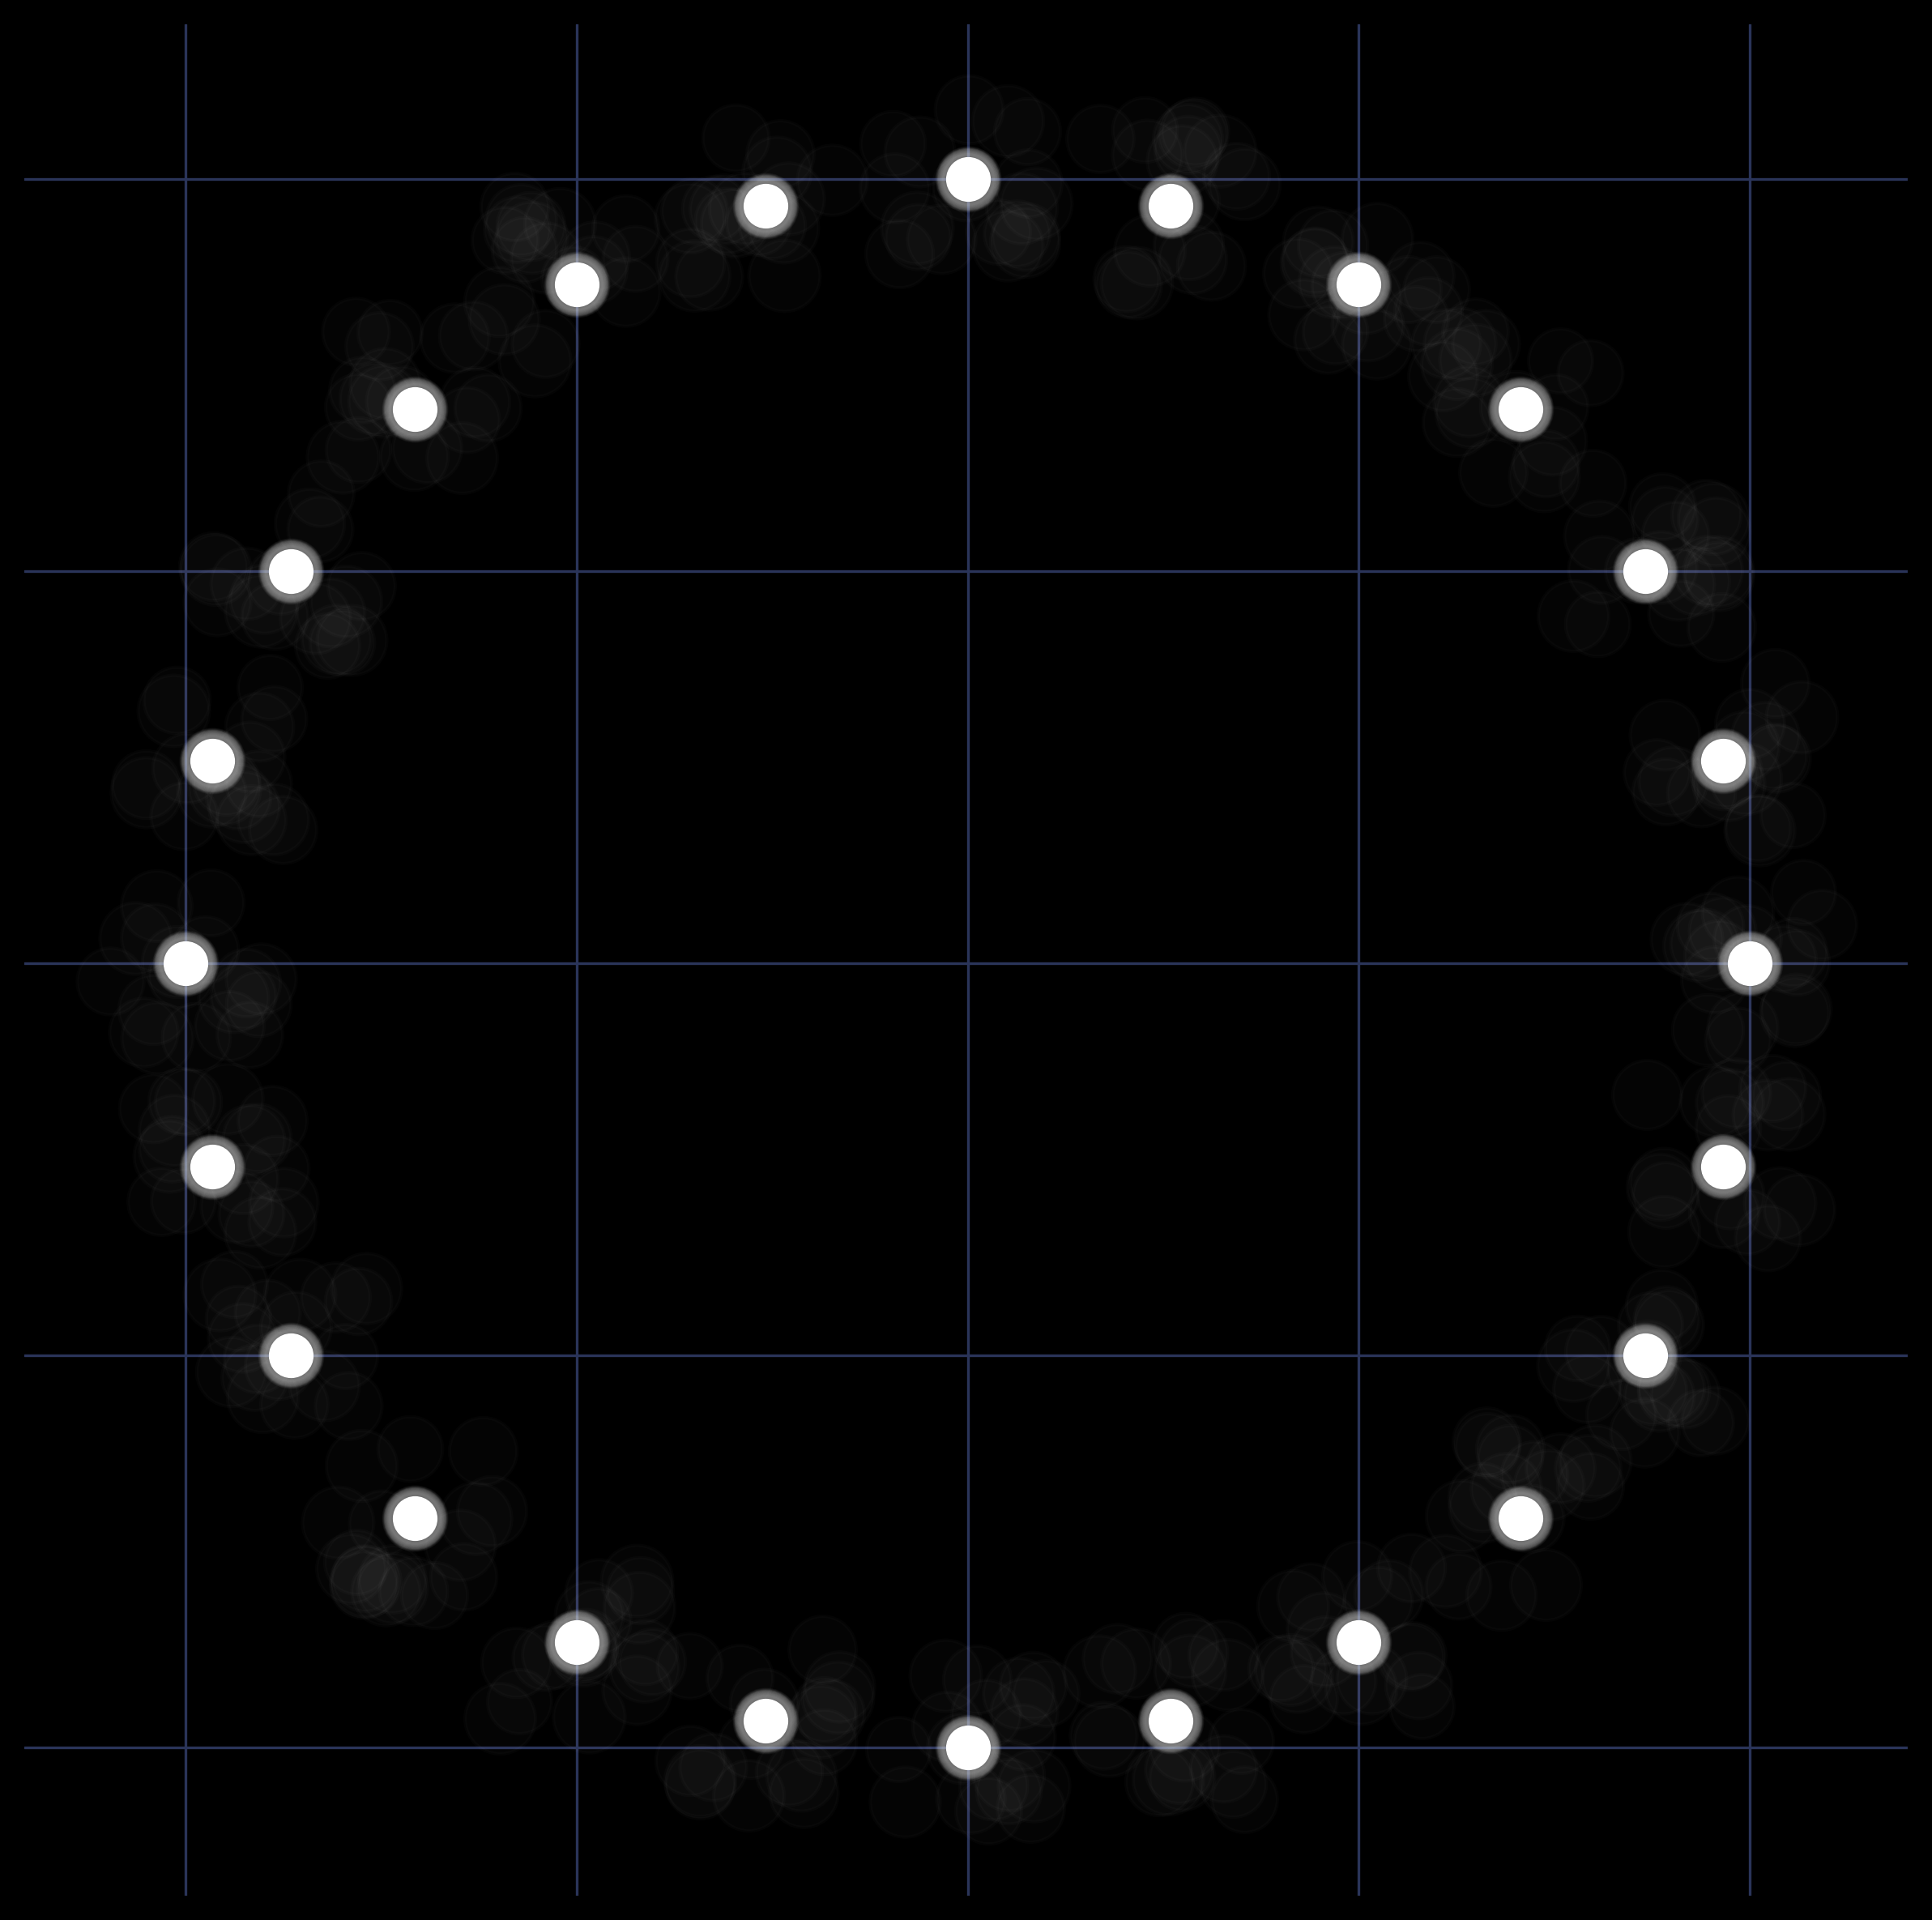

In [30]:
from graph_utils import *

G = nx.cycle_graph(24)
pos = nx.circular_layout(G)

draw_glow_nodes(G,pos)


### EEG

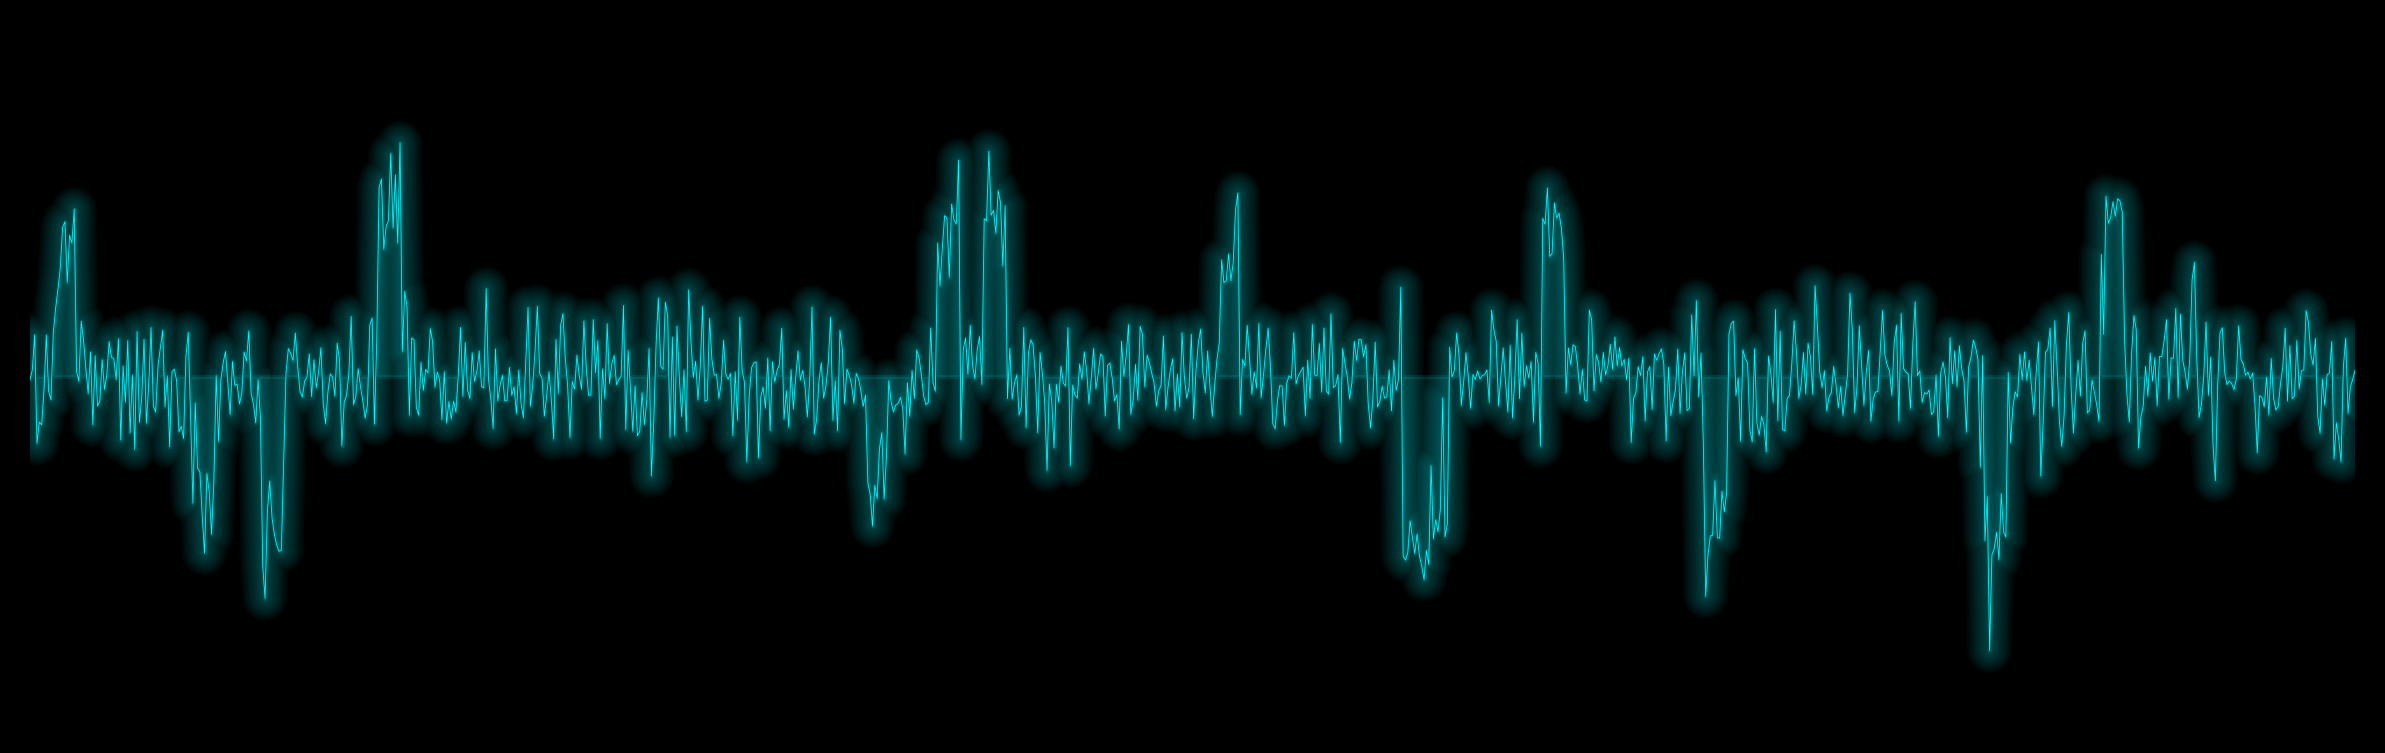

In [125]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
#plot random noise around 1 and 0 


# Define the mask
mask = np.ones(1000)

for i in range(100):

    random_number = random.random()

    if random_number < 0.3:
        # Set 0 for the first 2/4 of the array
        mask[10*i:10*(i+1)] = 1
    else:
        mask[10*i:10*(i+1)] = 0





x = np.linspace(0, 8*np.pi, 1000)
y = np.sin(2*x)*mask + np.random.normal(0, 0.2, 1000)


ax.plot(x, y, linewidth=0.2)


mplcyberpunk.add_glow_effects()
# Turn off axis numbers
plt.xticks([])   # Turn off x-axis numbers
plt.yticks([])   # Turn off y-axis numbers

# Set limits to the axis
plt.xlim(0, 8*np.pi)  # Set x-axis limits
plt.ylim(-2, 2)   # Set y-axis limits

# Turn off the grid
plt.grid(False)

ax.set_facecolor('black')
fig.set_facecolor('black')

plt.show()

plt.savefig('demo.png', transparent=True)




    



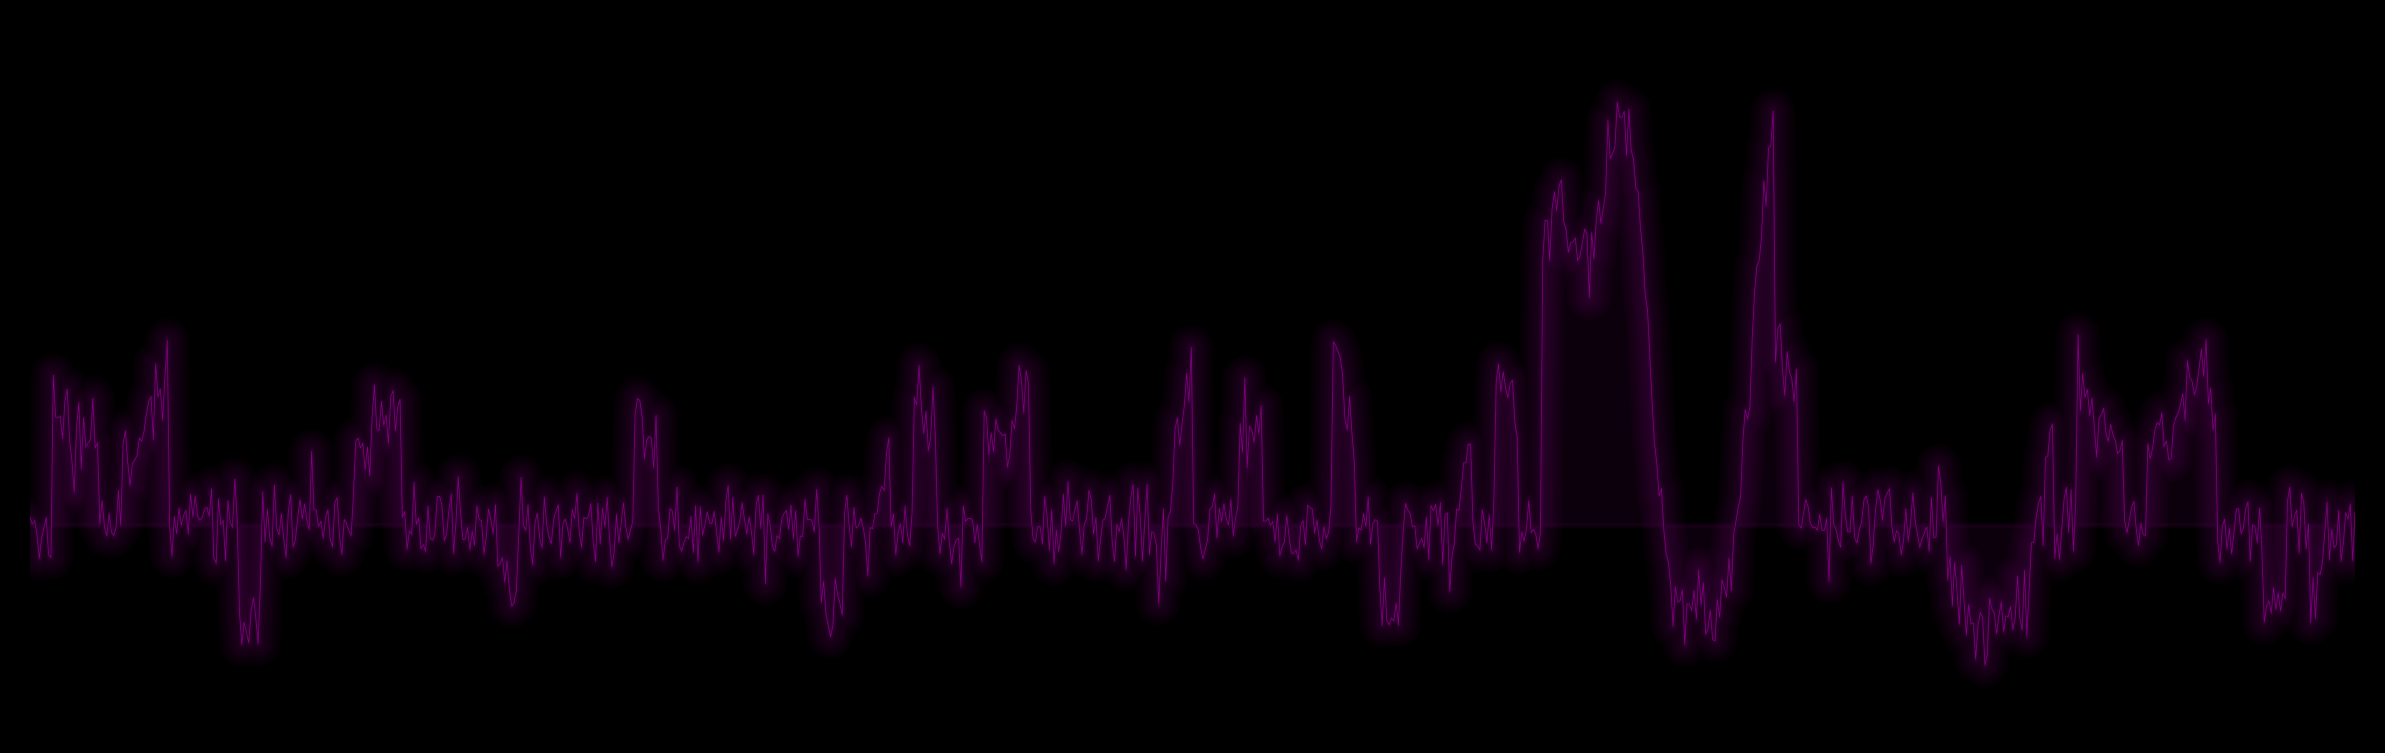

In [26]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
#plot random noise around 1 and 0 


# Define the mask
mask = np.ones(1000)

for i in range(100):

    random_number = random.random()

    if random_number < 0.3:
        # Set 0 for the first 2/4 of the array
        mask[10*i:10*(i+1)] = 1
    else:
        mask[10*i:10*(i+1)] = 0

    mask[650:750]=2





x = np.linspace(0, 8*np.pi, 1000)
y = (np.sin(2*x) + 0.7*np.cos(4*x)+ 0.3*np.cos(8*x)+  mask/2   )*mask  + np.random.normal(0, 0.2, 1000)


ax.plot(x, y, linewidth=0.2, color='purple')


mplcyberpunk.add_glow_effects()
# Turn off axis numbers
plt.xticks([])   # Turn off x-axis numbers
plt.yticks([])   # Turn off y-axis numbers

# Set limits to the axis
plt.xlim(0, 8*np.pi)  # Set x-axis limits
plt.ylim(-2, 5)   # Set y-axis limits

# Turn off the grid
plt.grid(False)

ax.set_facecolor('black')
fig.set_facecolor('black')
plt.savefig('demo.png', transparent=True)
plt.show()



[1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
{0: 1.0, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5}
{0: 0.5, 1: 1.0, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 1.0, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, 11: 0.5, 12: 0.5, 13: 1.0, 14: 0.5, 15: 0.5, 16: 0.5, 17: 0.5, 18: 0.5, 19: 0.5, 20: 0.5, 21: 1.0, 22: 1.0, 23: 1.0, 24: 0.5, 25: 0.5, 26: 0.5, 27: 0.5, 28: 0.5, 29: 0.5, 30: 0.5, 31: 0.5, 32: 0.5, 33: 1.0, 34: 1.0, 35: 0.5, 36: 0.5, 37: 0.5, 38: 0.5, 39: 1.0, 40: 0.5, 41: 0.5, 42: 0.5, 43: 0.5, 44: 1.0, 45: 0.5, 46: 0.5, 47: 0.5, 48: 0.5, 49: 0.5, 50: 0.5, 51: 0.5, 52: 0.5, 53: 0.5, 54: 0.5, 55: 0.5, 56: 0.5, 57: 0.5, 58: 0.5, 59: 0.5, 60: 0.5, 61: 0.5, 62: 1.0, 63: 0.5, 64: 0.5, 65: 0.5, 66: 0.5, 67: 0.5, 68: 0.5, 69: 0.5, 70: 0.5, 71: 0.5, 72: 0.5, 73: 0.5, 74: 1.0, 75: 0.5, 76: 0.5, 77: 1.0, 78: 0.5, 79: 1.0, 80: 0.5, 81: 0.5, 82: 0.5, 83: 0.5, 84: 1.0, 85: 0.5, 86: 0.5, 87: 0.5, 88: 0.5, 89: 0.5, 90: 0.5, 91: 0.5, 92: 0.5, 93: 0.5, 94: 0.5, 95: 0.5, 96: 0.5, 97: 0.5, 98: 0.5, 99: 0.5

C:\Users\aleja\AppData\Local\Temp\ipykernel_22448\4261022480.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 9)
C:\Users\aleja\AppData\Local\Temp\ipykernel_22448\4261022480.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('gray'),


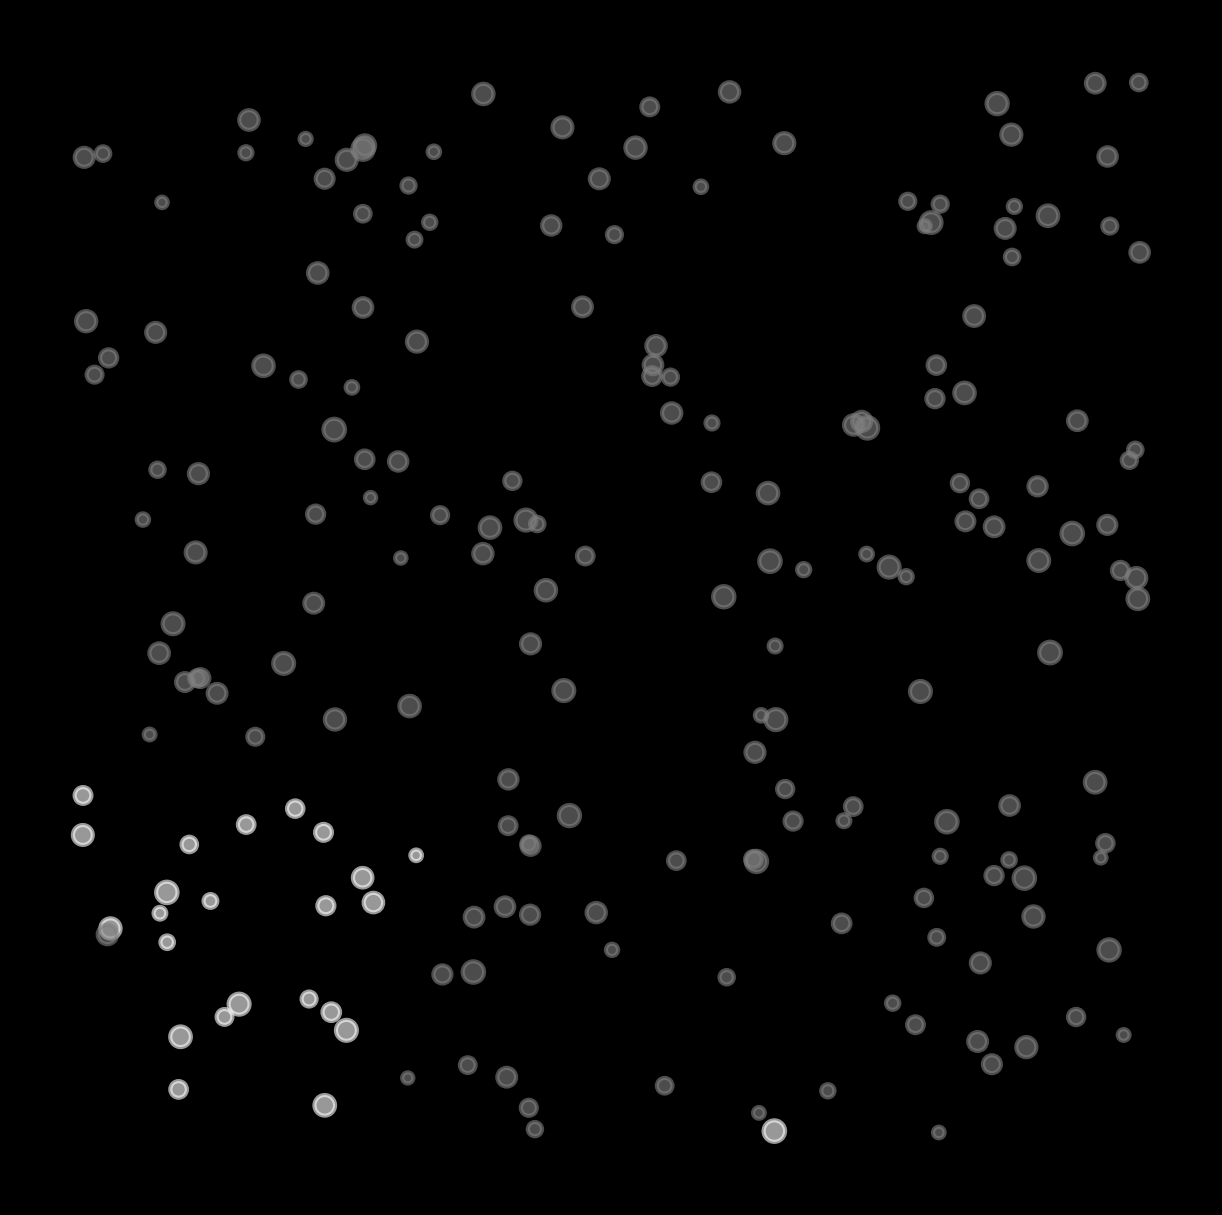

In [85]:
# Set a random seed for reproducibility
random.seed(42)

# Create a graph
G = nx.Graph()

# Add 500 nodes to the graph
num_nodes = 200
G.add_nodes_from(range(num_nodes))

# Generate random positions for each node
node_positions = {node: (random.uniform(0, 1), random.uniform(0, 1)) for node in G.nodes()}

# Assign a random value between 0 and 1 to each node
node_values = {node: random.uniform(0.2, 1) for node in G.nodes()}

# Draw the graph with node colors based on values

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Split the space into 9 quadrants with 3 rows and 3 columns
quadrant_size_x = 1 / 3
quadrant_size_y = 1 / 3
quadrants = [
    (
        int(pos[0] // quadrant_size_x) + int(pos[1] // quadrant_size_y)*3,
    )
    for node, pos in node_positions.items()
]

# Assign a group to each node based on the probability distribution
node_groups = {}
for node, quadrant in zip(G.nodes(), quadrants):
    probability = random.random()  # Probability between 0 and 1

    # Assign the node to its group with a probability of 80%, otherwise to one of the other eight groups
    if probability < 0.9:
        node_groups[node] = quadrant[0] % 9  # Assign to the same group as the quadrant's x-coordinate
    else:
        other_groups = [i for i in range(9) if i != quadrant[0] % 9]
        node_groups[node] = random.choice(other_groups)

# Create a colormap based on the number of groups
cmap = plt.cm.get_cmap('tab10', 9)

# Define different sizes for each node
node_sizes = {node: random.uniform(7, 27) for node in G.nodes()}

# Map the number between 0 and 8 to a value between 0 and 1 for each group
node_signal = np.array([1,0,0,0,0,0,0,0,0], dtype=float)
node_signal[node_signal <0.20] = 0.5

print(node_signal)

group_values = {group: node_signal[group] for group in range(9)}

print(group_values)

# Assign the same value between 0 and 1 to all nodes in the same group
node_values = {node: group_values[node_groups[node]] for node in G.nodes()}

print(node_values)

# Draw the graph with node colors based on groups
nx.draw(
    G,
    pos=node_positions,
    with_labels=False,
    node_size=[node_sizes[node] for node in G.nodes()],
    #node_color=[cmap(group) for group in node_groups.values()],
    node_color=[node_values[node] for node in G.nodes()],
    cmap=plt.cm.get_cmap('gray'),
    alpha=0.8,
    vmin=0,
    vmax=1,
    edge_color='gray',
)

# Add a colorbar to show the mapping

ax.set_facecolor('black')
fig.set_facecolor('black')
# Show the plot
plt.show()

In [73]:
group_values

{0: 0.6516623807263706,
 1: 0.25488812225948476,
 2: 0.8121259007108677,
 3: 0.3657258962773268,
 4: 0.3727610815349398,
 5: 0.8957563414156358,
 6: 0.4628476427457844,
 7: 0.318043343953155,
 8: 0.9204248285054066}

C:\Users\aleja\AppData\Local\Temp\ipykernel_22448\3245698147.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('gray'),


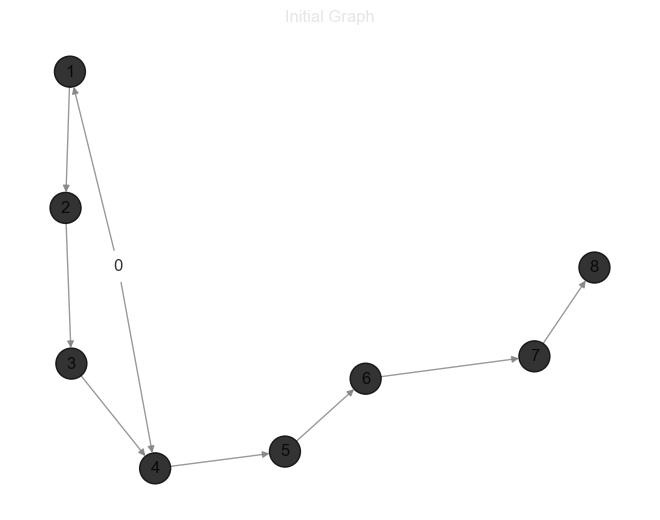

Initial node values:
[1, 0, 0, 0, 0, 0, 0, 0, 0]
New node values:
{0: 1, 1: 1.0, 2: 0.0, 3: 0.0, 4: 0.5, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}


C:\Users\aleja\AppData\Local\Temp\ipykernel_22448\3245698147.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('gray'),


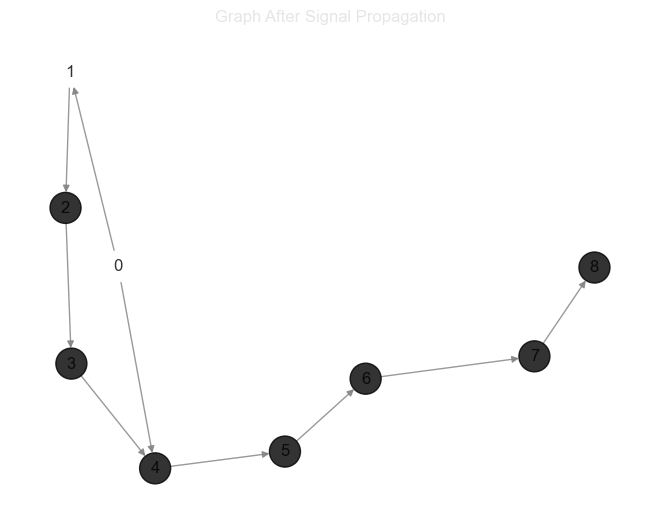

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Set a random seed for reproducibility
random.seed(42)

# Define the connectivity matrix
connectivity_matrix = np.array([
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Create a directed graph from the connectivity matrix
G = nx.DiGraph(connectivity_matrix)


# Assign initial values (0.5 or 1) to each node
node_values = [1,0,0,0,0,0,0,0,0]

# Draw the initial graph with node colors based on initial values
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color=[node_values[node] for node in G.nodes()],
    cmap=plt.cm.get_cmap('gray'),
    vmin=0.5,
    vmax=1,
    alpha=0.8,
    edge_color='gray',
)
plt.title("Initial Graph")

# Show the plot
plt.show()

# Propagate the signal through the graph
alpha = 1  # Damping factor for signal propagation
num_iterations = 1
print("Initial node values:")
print(node_values)
for _ in range(num_iterations):
    new_node_values = {}

    for node in G.nodes():
        in_neighbors = list(G.predecessors(node))
        if in_neighbors:
            new_value = alpha * sum(node_values[neighbor] for neighbor in in_neighbors) / len(in_neighbors)
            new_node_values[node] = new_value
        else:
            new_node_values[node] = node_values[node]

    node_values = new_node_values

print("New node values:")
print(node_values)
# Draw the graph after signal propagation with updated node values
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color=[node_values[node] for node in G.nodes()],
    cmap=plt.cm.get_cmap('gray'),
    vmin=0.5,
    vmax=1,
    alpha=0.8,
    edge_color='gray',
)
plt.title("Graph After Signal Propagation")

# Show the plot
plt.show()

In [65]:
adjacency_matrix = nx.to_numpy_array(G)

# Print the connectivity matrix
print("Connectivity Matrix:")
print(adjacency_matrix)

Connectivity Matrix:
[[0. 0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0.]]


## Manim

In [2]:
import numpy as np
from copy import deepcopy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from numpy import radians as rad
from matplotlib.animation import FuncAnimation
from scipy.ndimage import convolve,convolve1d
import cmasher
import seaborn as sns

In [3]:
NUM_LAYERS = 10
NEURONS_PER_LAYER = 10
NUM_FRAMES=2000

In [4]:
def network_init():
	return np.zeros((NUM_LAYERS, NEURONS_PER_LAYER),dtype=bool)
   

def network_advance(old_network, sigma,spont_prob):
    '''Advance one time step'''
    network = deepcopy(old_network)
    spont = np.random.rand(*network.shape)
    network[spont<spont_prob] = 1 # Random spontaneous activity
    for layer_num in range(NUM_LAYERS-1, 0, -1):
        # Randomly propagate, starting from the last layer
        propagation_mask = np.random.rand(NEURONS_PER_LAYER) < sigma*np.sum(network[layer_num-1,:])/NEURONS_PER_LAYER
        network[layer_num] = propagation_mask
        network[layer_num-1] = np.zeros(NEURONS_PER_LAYER)
    return network
                    

def run_simulation(network, n_steps, sigma=1, spont_prob=0.01):
    '''Run simulation with stochastic activity for n_steps'''
    network_states = np.zeros((n_steps, NUM_LAYERS, NEURONS_PER_LAYER))
    network_states[0,:,:] = network
    
    for step in range(1,n_steps):
        network_states[step, :,:] = network_advance(network_states[step-1, :,:], sigma,spont_prob)
    return network_states


# --- Smoothing activity
def smooth_activity(network_states, time_stretch=3):
    '''
        Smooth the activity in time for a more eye-pleasant animation 
    '''
    def get_symmetric_kernel(slope=-20, npoints=100):
        t = np.linspace(0,1,npoints)
        kernel = np.zeros_like(t)
        t_mask = t>0.5
        kernel[t_mask]=np.exp(slope*t[t_mask])
        kernel[(t<=0.5)]=np.exp(slope*t[t_mask])[::-1]
        return kernel/kernel[t_mask][0]

    kernel = get_symmetric_kernel(-60)
    smoothed_activity = np.zeros((network_states.shape[0]*time_stretch, network_states.shape[1], network_states.shape[2]))
    smoothed_activity[::time_stretch, :, :] = network_states
    smoothed_activity = convolve1d(smoothed_activity, kernel, axis=0,mode="constant",origin=0)
    return smoothed_activity

In [5]:
NUM_LAYERS = 10
NEURONS_PER_LAYER = 10
NUM_FRAMES=2000

# --- Simulation
network = network_init()
network_states = run_simulation(network, NUM_FRAMES, sigma=1,spont_prob=0.01)
smoothed_states = smooth_activity(network_states)

In [6]:
def multilayered_graph(subset_sizes, edge_prob=0.35):
    ''' Generate a networkx multilayered graph with specied layer sizes '''
    extents = nx.utils.pairwise(itertools.accumulate([0] + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in nx.utils.pairwise(layers):
        all_edges = list(itertools.product(layer1, layer2))
        selected_edges = np.random.choice(range(len(all_edges)),  size=int(len(all_edges)*edge_prob), replace=False)
        for k in selected_edges:  
            G.add_edge(*all_edges[k])
    return G

In [1]:
from manim import *
import networkx as nx
from scipy.interpolate import interp1d
import itertools

c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Manim Community v0.18.0

In [8]:
# --- Animation with Manim
class BranchingModelRearranging(Scene):
    def construct(self):
        
        # Set up coordinate systems
        shuffled_ax = Axes(x_range=(0,NUM_LAYERS), y_range=(0,NEURONS_PER_LAYER),x_length=7, y_length=7)
        layers_ax = Axes(x_range=(0,NUM_LAYERS), y_range=(0,NEURONS_PER_LAYER),x_length=13, y_length=7)
        
        # --- Mapping
        mapping = np.array(list(itertools.product(range(shuffled_ax.x_range[1]), range(shuffled_ax.y_range[1]))), dtype=object)
        layout_layered = {k: layers_ax.c2p(*mapping[k]) for k in range(NUM_LAYERS*NEURONS_PER_LAYER)}
        np.random.shuffle(mapping)
        layout_shuffle = {k: shuffled_ax.c2p(*mapping[k]) for k in range(NUM_LAYERS*NEURONS_PER_LAYER)}

        # Construct a graph object
        G = multilayered_graph(([NEURONS_PER_LAYER]*NUM_LAYERS))
        graph = Graph.from_networkx(G,layout=layout_shuffle,vertex_config={'radius': 0.2}, 
                                    edge_config={"stroke_width":0.5, "stroke_color":GRAY})
        
        # Interpolation function to animate the color of the nodes according to simulation data
        value_interp_function = interp1d(np.arange(smoothed_states.shape[0]), 
                                         smoothed_states.reshape(smoothed_states.shape[0], NUM_LAYERS*NEURONS_PER_LAYER), axis=0)
        
        cmap = cmasher.get_sub_cmap(sns.color_palette("mako",as_cmap=True),0.2,1)
        
        
        def update_node_colors(graph):
            for k in range(len(G.nodes)):
                color =  cmap(value_interp_function(time_tracker.get_value())[k])
                graph[k].set_color(rgba_to_color(color))
            
        time_tracker = ValueTracker() # Progressing through simulation data
        graph.add_updater(update_node_colors)
        self.add(graph)
        
        # --- Animating (make sure that there is enough frames in the simulation data)
        FPS = 30 
        PLAY_TIME_BEFORE_REARRANGING = 20
        PLAY_TIME_AFTER_REARRANGING = 5
        REARRANGING_TIME = 2
        
        def get_shuffle2layered_anims():
            return [graph[k].animate.move_to(layout_layered[k]) for k in range(len(G.nodes))]
        
        def animate_network(playing_time):
            self.play(time_tracker.animate.increment_value(int(playing_time*FPS)), run_time=playing_time, rate_func=linear)
        
        animate_network(PLAY_TIME_BEFORE_REARRANGING)
       
            
        self.play(*(get_shuffle2layered_anims() + 
                    [time_tracker.animate.increment_value(int(REARRANGING_TIME*FPS))]),
                    run_time=REARRANGING_TIME, rate_func=linear)

        animate_network(PLAY_TIME_AFTER_REARRANGING)
        self.wait()

In [9]:
%manim BranchingModelRearranging

RuntimeError: Manim could not find ffmpeg, which is required for generating video output.
For installing ffmpeg please consult https://docs.manim.community/en/stable/installation.html
Make sure to either add ffmpeg to the PATH environment variable
or set path to the ffmpeg executable under the ffmpeg header in Manim's configuration.